# Data preparation

## Imports & data

In [397]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

athletes = pd.read_csv("../dataset/Olympic_Athlete_Bio.csv")
athlete_results = pd.read_csv("../dataset/Olympic_Athlete_Event_Results.csv")
countries = pd.read_csv("../dataset/Olympics_Country.csv")
games = pd.read_csv("../dataset/Olympics_Games.csv")

## Data merging

- Merge weight, height, born and sex

In [398]:
dataset = athlete_results.merge(athletes[['athlete_id','weight', 'height', 'born', 'sex']], on='athlete_id', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female


- Merge year

In [399]:
dataset = dataset.merge(games[['edition_id', 'year']], on='edition_id', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male,1908
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male,1908
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male,1908
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male,1908
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male,1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female,2022
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female,2022
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female,2022
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female,2022


## Encoding

In [400]:
# Convert categorical variables to numerical
sex_encoder = LabelEncoder()
sport_encoder = LabelEncoder()
event_encoder = LabelEncoder()
medal_encoder = LabelEncoder()

dataset['sex'] = sex_encoder.fit_transform(dataset['sex'])
dataset['sport'] = sport_encoder.fit_transform(dataset['sport'])
dataset['event'] = event_encoder.fit_transform(dataset['event'])
dataset['medal'] = medal_encoder.fit_transform(dataset['medal'])

dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year
0,1908 Summer Olympics,5,ANZ,9,53,56265,Ernest Hutcheon,64710,DNS,3,False,na,na,1889-06-17,1,1908
1,1908 Summer Olympics,5,ANZ,9,178,56313,Henry Murray,64756,DNS,3,False,na,na,1886-01-14,1,1908
2,1908 Summer Olympics,5,ANZ,9,227,56338,Harvey Sutton,64808,3 h8 r1/2,3,False,na,na,1882-02-18,1,1908
3,1908 Summer Olympics,5,ANZ,9,227,56338,Guy Haskins,922519,DNS,3,False,na,na,1883-12-23,1,1908
4,1908 Summer Olympics,5,ANZ,9,227,56338,Joseph Lynch,64735,DNS,3,False,na,na,1878-04-22,1,1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,21,628,19019671,Karlien Sleper,148662,16,3,False,na,na,1993-01-11,0,2022
314903,2022 Winter Olympics,62,SVK,21,628,19019671,Viktória Čerňanská,138683,17,3,False,76,175.0,2002-03-29,0,2022
314904,2022 Winter Olympics,62,KOR,21,628,19019671,Kim Yu-Ran,137542,18,3,False,78,170.0,1992-04-23,0,2022
314905,2022 Winter Olympics,62,JAM,21,628,19019671,Jazmine Fenlator-Victorian,128682,19,3,False,75-78,175.0,1985-08-29,0,2022


## Conversions

- Convert height and weight to numeric value

In [401]:
dataset["pos"] = pd.to_numeric(dataset["pos"], errors="coerce")
dataset["height"] = pd.to_numeric(dataset["height"], errors="coerce")
dataset["weight"] = pd.to_numeric(dataset["weight"], errors="coerce")
dataset["born"] = pd.to_datetime(dataset["born"], errors="coerce")
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year
0,1908 Summer Olympics,5,ANZ,9,53,56265,Ernest Hutcheon,64710,NaN,3,False,NaN,NaN,1889-06-17,1,1908
1,1908 Summer Olympics,5,ANZ,9,178,56313,Henry Murray,64756,NaN,3,False,NaN,NaN,1886-01-14,1,1908
2,1908 Summer Olympics,5,ANZ,9,227,56338,Harvey Sutton,64808,NaN,3,False,NaN,NaN,1882-02-18,1,1908
3,1908 Summer Olympics,5,ANZ,9,227,56338,Guy Haskins,922519,NaN,3,False,NaN,NaN,1883-12-23,1,1908
4,1908 Summer Olympics,5,ANZ,9,227,56338,Joseph Lynch,64735,NaN,3,False,NaN,NaN,1878-04-22,1,1908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,21,628,19019671,Karlien Sleper,148662,16.0,3,False,NaN,NaN,1993-01-11,0,2022
314903,2022 Winter Olympics,62,SVK,21,628,19019671,Viktória Čerňanská,138683,17.0,3,False,76.0,175.0,2002-03-29,0,2022
314904,2022 Winter Olympics,62,KOR,21,628,19019671,Kim Yu-Ran,137542,18.0,3,False,78.0,170.0,1992-04-23,0,2022
314905,2022 Winter Olympics,62,JAM,21,628,19019671,Jazmine Fenlator-Victorian,128682,19.0,3,False,NaN,175.0,1985-08-29,0,2022


## Calculations

In [402]:
# Calculate the age
dataset['age'] = dataset['year'] - dataset['born'].dt.year

# Calculate bmi
dataset['bmi'] = pd.to_numeric(dataset['weight'] / ((dataset['height'] / 100) ** 2))

# Simplify Gold/Medal/Bronze to win or loss
dataset['podium'] = (dataset['medal'] != 'na').astype(int)
dataset


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year,age,bmi,podium
0,1908 Summer Olympics,5,ANZ,9,53,56265,Ernest Hutcheon,64710,NaN,3,False,NaN,NaN,1889-06-17,1,1908,19.0,NaN,1
1,1908 Summer Olympics,5,ANZ,9,178,56313,Henry Murray,64756,NaN,3,False,NaN,NaN,1886-01-14,1,1908,22.0,NaN,1
2,1908 Summer Olympics,5,ANZ,9,227,56338,Harvey Sutton,64808,NaN,3,False,NaN,NaN,1882-02-18,1,1908,26.0,NaN,1
3,1908 Summer Olympics,5,ANZ,9,227,56338,Guy Haskins,922519,NaN,3,False,NaN,NaN,1883-12-23,1,1908,25.0,NaN,1
4,1908 Summer Olympics,5,ANZ,9,227,56338,Joseph Lynch,64735,NaN,3,False,NaN,NaN,1878-04-22,1,1908,30.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,21,628,19019671,Karlien Sleper,148662,16.0,3,False,NaN,NaN,1993-01-11,0,2022,29.0,NaN,1
314903,2022 Winter Olympics,62,SVK,21,628,19019671,Viktória Čerňanská,138683,17.0,3,False,76.0,175.0,2002-03-29,0,2022,20.0,24.816327,1
314904,2022 Winter Olympics,62,KOR,21,628,19019671,Kim Yu-Ran,137542,18.0,3,False,78.0,170.0,1992-04-23,0,2022,30.0,26.989619,1
314905,2022 Winter Olympics,62,JAM,21,628,19019671,Jazmine Fenlator-Victorian,128682,19.0,3,False,NaN,175.0,1985-08-29,0,2022,37.0,NaN,1


## Remove columns

- Remove teamsports, keep only individual sports

In [403]:
dataset = dataset[dataset['isTeamSport'] == False]
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,year,age,bmi,podium
0,1908 Summer Olympics,5,ANZ,9,53,56265,Ernest Hutcheon,64710,NaN,3,False,NaN,NaN,1889-06-17,1,1908,19.0,NaN,1
1,1908 Summer Olympics,5,ANZ,9,178,56313,Henry Murray,64756,NaN,3,False,NaN,NaN,1886-01-14,1,1908,22.0,NaN,1
2,1908 Summer Olympics,5,ANZ,9,227,56338,Harvey Sutton,64808,NaN,3,False,NaN,NaN,1882-02-18,1,1908,26.0,NaN,1
3,1908 Summer Olympics,5,ANZ,9,227,56338,Guy Haskins,922519,NaN,3,False,NaN,NaN,1883-12-23,1,1908,25.0,NaN,1
4,1908 Summer Olympics,5,ANZ,9,227,56338,Joseph Lynch,64735,NaN,3,False,NaN,NaN,1878-04-22,1,1908,30.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,21,628,19019671,Karlien Sleper,148662,16.0,3,False,NaN,NaN,1993-01-11,0,2022,29.0,NaN,1
314903,2022 Winter Olympics,62,SVK,21,628,19019671,Viktória Čerňanská,138683,17.0,3,False,76.0,175.0,2002-03-29,0,2022,20.0,24.816327,1
314904,2022 Winter Olympics,62,KOR,21,628,19019671,Kim Yu-Ran,137542,18.0,3,False,78.0,170.0,1992-04-23,0,2022,30.0,26.989619,1
314905,2022 Winter Olympics,62,JAM,21,628,19019671,Jazmine Fenlator-Victorian,128682,19.0,3,False,NaN,175.0,1985-08-29,0,2022,37.0,NaN,1


- Remove columns

In [404]:

dataset = dataset.drop(columns=['edition_id', 'result_id', 'athlete_id', 'isTeamSport', 'edition', 'country_noc', 'athlete', 'born'])
dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
0,9,53,NaN,3,NaN,NaN,1,1908,19.0,NaN,1
1,9,178,NaN,3,NaN,NaN,1,1908,22.0,NaN,1
2,9,227,NaN,3,NaN,NaN,1,1908,26.0,NaN,1
3,9,227,NaN,3,NaN,NaN,1,1908,25.0,NaN,1
4,9,227,NaN,3,NaN,NaN,1,1908,30.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
314902,21,628,16.0,3,NaN,NaN,0,2022,29.0,NaN,1
314903,21,628,17.0,3,76.0,175.0,0,2022,20.0,24.816327,1
314904,21,628,18.0,3,78.0,170.0,0,2022,30.0,26.989619,1
314905,21,628,19.0,3,NaN,175.0,0,2022,37.0,NaN,1


## Remove NaN's

In [405]:
dataset = dataset.dropna()
dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
20,9,136,3.0,0,76.0,184.0,1,1908,29.0,22.448015,1
70,94,170,2.0,2,65.0,170.0,1,1908,17.0,22.491349,1
75,94,15,3.0,0,65.0,170.0,1,1908,17.0,22.491349,1
130,97,757,3.0,0,84.0,188.0,1,1912,29.0,23.766410,1
360,8,798,18.0,3,58.0,165.0,0,1988,19.0,21.303949,1
...,...,...,...,...,...,...,...,...,...,...,...
314898,21,628,12.0,3,74.0,180.0,0,2022,28.0,22.839506,1
314899,21,628,13.0,3,75.0,169.0,0,2022,32.0,26.259585,1
314900,21,628,14.0,3,73.0,171.0,0,2022,29.0,24.964946,1
314903,21,628,17.0,3,76.0,175.0,0,2022,20.0,24.816327,1


## Remove wrong data

In [406]:
bmi_lower_than_10 = dataset[dataset['bmi'] < 20]
bmi_lower_than_10

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
384,94,204,62.0,3,56.0,171.0,0,2000,16.0,19.151192,1
387,94,204,49.0,3,56.0,171.0,0,2004,20.0,19.151192,1
418,94,46,48.0,3,45.0,165.0,1,1988,30.0,16.528926,1
435,82,242,46.0,3,45.0,151.0,0,2000,25.0,19.735976,1
436,82,796,38.0,3,45.0,151.0,0,2000,25.0,19.735976,1
...,...,...,...,...,...,...,...,...,...,...,...
314812,86,642,43.0,3,63.0,183.0,1,2022,26.0,18.812147,1
314815,86,553,39.0,3,63.0,183.0,1,2022,26.0,18.812147,1
314826,88,780,4.0,3,53.0,165.0,1,2022,22.0,19.467401,1
314838,88,282,5.0,3,53.0,165.0,1,2022,22.0,19.467401,1


## Final dataset

In [407]:
dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
20,9,136,3.0,0,76.0,184.0,1,1908,29.0,22.448015,1
70,94,170,2.0,2,65.0,170.0,1,1908,17.0,22.491349,1
75,94,15,3.0,0,65.0,170.0,1,1908,17.0,22.491349,1
130,97,757,3.0,0,84.0,188.0,1,1912,29.0,23.766410,1
360,8,798,18.0,3,58.0,165.0,0,1988,19.0,21.303949,1
...,...,...,...,...,...,...,...,...,...,...,...
314898,21,628,12.0,3,74.0,180.0,0,2022,28.0,22.839506,1
314899,21,628,13.0,3,75.0,169.0,0,2022,32.0,26.259585,1
314900,21,628,14.0,3,73.0,171.0,0,2022,29.0,24.964946,1
314903,21,628,17.0,3,76.0,175.0,0,2022,20.0,24.816327,1


## Correlation

### Correlation entire dataset

In [408]:
dataset.corr(numeric_only=True)

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
sport,1.000000,-0.114316,-0.100071,0.024046,0.114818,0.062520,0.039147,0.107384,-0.127503,0.127641,NaN
event,-0.114316,1.000000,-0.058905,-0.042034,0.115164,-0.045473,0.078364,-0.005488,0.197296,0.200092,NaN
pos,-0.100071,-0.058905,1.000000,0.354855,-0.109169,-0.047392,0.050561,0.089321,0.028669,-0.111983,NaN
medal,0.024046,-0.042034,0.354855,1.000000,-0.051628,-0.023684,-0.009739,0.087372,0.001878,-0.050593,NaN
weight,0.114818,0.115164,-0.109169,-0.051628,1.000000,0.746315,0.525910,-0.034523,0.138662,0.843092,NaN
height,0.062520,-0.045473,-0.047392,-0.023684,0.746315,1.000000,0.536039,0.013791,0.061781,0.281351,NaN
sex,0.039147,0.078364,0.050561,-0.009739,0.525910,0.536039,1.000000,-0.177432,0.135268,0.350036,NaN
year,0.107384,-0.005488,0.089321,0.087372,-0.034523,0.013791,-0.177432,1.000000,0.123650,-0.066070,NaN
age,-0.127503,0.197296,0.028669,0.001878,0.138662,0.061781,0.135268,0.123650,1.000000,0.158272,NaN
bmi,0.127641,0.200092,-0.111983,-0.050593,0.843092,0.281351,0.350036,-0.066070,0.158272,1.000000,NaN


### Correlation by sport

In [409]:
for sport in dataset['sport'].unique():
    sport_data = dataset[dataset['sport'] == sport]
    print(sport)
    print(sport_data.corr(numeric_only=True))
    print("\n")

9
        sport     event       pos     medal    weight    height       sex  \
sport     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
event     NaN  1.000000  0.199428  0.062148  0.233400  0.120355 -0.049871   
pos       NaN  0.199428  1.000000  0.322419 -0.280994 -0.280611  0.000304   
medal     NaN  0.062148  0.322419  1.000000 -0.096925 -0.105191 -0.009217   
weight    NaN  0.233400 -0.280994 -0.096925  1.000000  0.764777  0.346747   
height    NaN  0.120355 -0.280611 -0.105191  0.764777  1.000000  0.493954   
sex       NaN -0.049871  0.000304 -0.009217  0.346747  0.493954  1.000000   
year      NaN -0.031151  0.278406  0.133751 -0.163176 -0.137456 -0.295412   
age       NaN  0.081144  0.248306  0.086279 -0.039641 -0.086974  0.027284   
bmi       NaN  0.247945 -0.231680 -0.073286  0.919430  0.462166  0.193294   
podium    NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            year       age       bmi  podium  
sport        NaN       NaN

## Graphs

In [410]:
import matplotlib.pyplot as plt

### BMI distribution

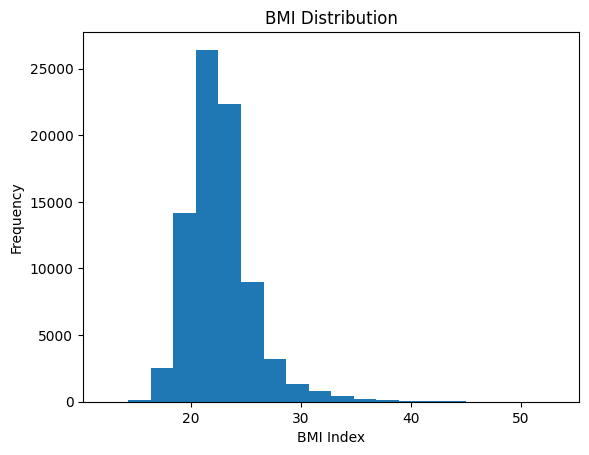

In [411]:
import math as math

# This code is in comments to more easily compare with the Z-indexed values.
# Uncomment to a get different view, where you only see 'nomal range' BMIs. This gives a better look at the distribution for the average athlete.

# minBmi = math.floor(dataset['bmi'].min())
# maxBmi = 35 # not math.ceil(dataset['bmi'].max()) as it goes up to 55 and is not relevant to display the thing we want to actually show ...
# bins = list(range(minBmi, maxBmi))

dataset['bmi'].plot(kind = 'hist', bins = 20)
# plt.xticks(bins)

plt.title('BMI Distribution')
plt.xlabel("BMI Index")
plt.show()

### BMI distribution (Z-Indexed)

Text(0.5, 0, 'BMI Index (Z-Indexed)')

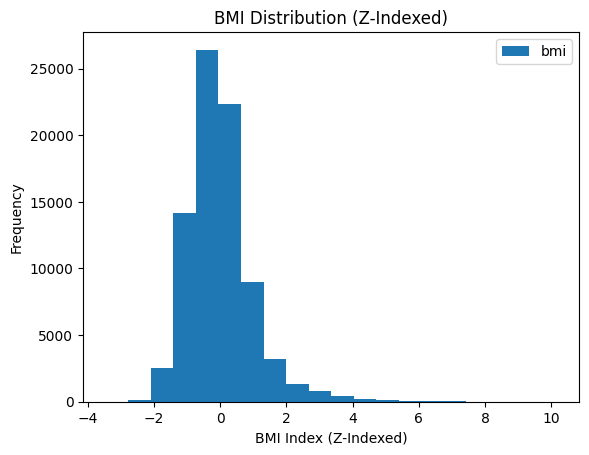

In [412]:
# pip install -U scikit-learn
from sklearn.preprocessing import StandardScaler
import math as math

bmi_z = StandardScaler().fit_transform(dataset[['bmi']]);
bmi_z = pd.DataFrame(bmi_z, columns = ['bmi'])

bmi_z.plot(kind = 'hist', bins = 20)
plt.title('BMI Distribution (Z-Indexed)')
plt.xlabel("BMI Index (Z-Indexed)")

### Age vs BMI

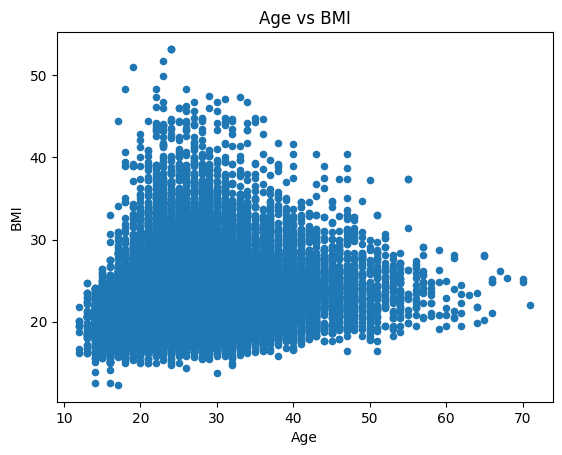

In [413]:

dataset.plot(x='age', y='bmi', kind='scatter')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()


### BMI vs Weight

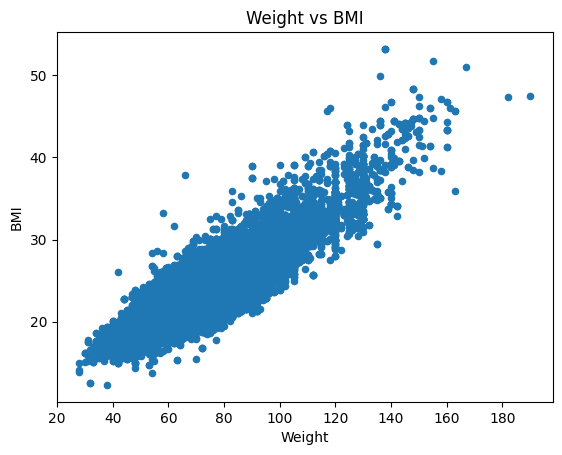

In [414]:
dataset.plot(x='weight', y='bmi', kind='scatter')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Weight vs BMI')
plt.show()

# Creating and training model

## KNN - Likelyhood of winning a medal (= being on podium) based on weight/height

In [415]:
dependant_predictors = dataset["podium"].values
independant_predictors = dataset[["weight", "height"]].values

# Scale the features as weight and height are not similar scales
scaler = StandardScaler()
independant_predictors = scaler.fit_transform(independant_predictors)

knn = KNeighborsClassifier(n_neighbors = 15)

x_train, x_test, y_train, y_test = train_test_split(independant_predictors, dependant_predictors, random_state = 42, test_size= 0.3, stratify = dependant_predictors)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print("Predictions: {}".format(y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("KNN Score: " + str(knn.score(x_test, y_test)))



Predictions: [1 1 1 ... 1 1 1]
Accuracy: 1.00
KNN Score: 1.0


In [416]:
# LINEAR REGRESSION AS EXAMPLE/TEST
# from sklearn.model_selection import train_test_split
# from sklearn import LinearRegression

# dependant_predictors = ["medal"]
# independant_predictors = ["weight", "height", "age", "sex", "sport", "bmi"] # would this really need weight/height as it is a function of BMI? Possibly height/weight still has some individual factors?

# dataset_dependant = dataset[dependant_predictors]
# dataset_independant = dataset[independant_predictors]

# x_train, x_test, y_train, y_test = train_test_split(independant_predictors, dependant_predictors)
# model = LinearRegression().fit(x_train, y_train)


# RANDOM CLASSIFIER, WIP
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is a pandas DataFrame
dependant_predictors = ["medal"]
independant_predictors = ["weight", "height", "age", "sex", "sport", "bmi", "event"]

dataset_dependant = dataset[dependant_predictors]
dataset_independant = dataset[independant_predictors]

X_train, X_test, y_train, y_test = train_test_split(dataset_independant, dataset_dependant, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

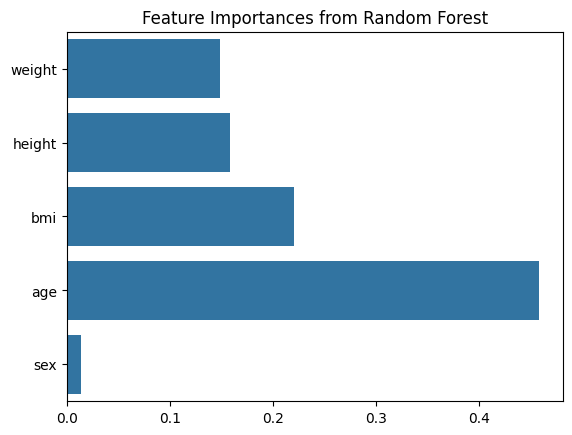

Total importance sum: 1.0000000000000002
Accuracy: 0.39469781238413054


array([240,  19, 505, ..., 496, 694,  49])

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Select relevant features for correlation analysis
features = ['weight', 'height', 'bmi', 'age', 'sex']
X = dataset[features]
y = dataset['event']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

import seaborn as sns

# Plot feature importances
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances from Random Forest')
plt.show()

# Sum of feature importances should be 1
total_importance = sum(model.feature_importances_)
print(f'Total importance sum: {total_importance}')

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Use the sorted unique indices directly as the labels parameter
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
y_pred

In [418]:
# Function to predict sport based on input features
def predict_sport(weight, height, age, sex):
    # Convert input data to a DataFrame
    input_data = pd.DataFrame({
        'weight': [weight],
        'height': [height],
        'bmi': [weight / ((height / 100) ** 2)],
        'age': [age],
        'sex': [sex_encoder.transform([sex])[0]]
    })
    
    # Predict and decode the result
    predicted_encoded  = model.predict(input_data)
    
    # Map back to the actual sport name using the inverse_transform method
    # predicted_sport = sport_encoder.inverse_transform(predicted_encoded)
    predicted_sport = event_encoder.inverse_transform(predicted_encoded)

    # Return the first predicted sport as a string
    return predicted_sport[0]

# Example usage of the prediction function
predicted_sport = predict_sport(weight=75, height=20, age=20, sex='Male')
print(f'Predicted Sport: {predicted_sport}')

Predicted Sport: 50 metres Freestyle, Men


# Tensorflow

## Dataset

In [419]:
tf_dataset = dataset.copy()
tf_dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
20,9,136,3.0,0,76.0,184.0,1,1908,29.0,22.448015,1
70,94,170,2.0,2,65.0,170.0,1,1908,17.0,22.491349,1
75,94,15,3.0,0,65.0,170.0,1,1908,17.0,22.491349,1
130,97,757,3.0,0,84.0,188.0,1,1912,29.0,23.766410,1
360,8,798,18.0,3,58.0,165.0,0,1988,19.0,21.303949,1
...,...,...,...,...,...,...,...,...,...,...,...
314898,21,628,12.0,3,74.0,180.0,0,2022,28.0,22.839506,1
314899,21,628,13.0,3,75.0,169.0,0,2022,32.0,26.259585,1
314900,21,628,14.0,3,73.0,171.0,0,2022,29.0,24.964946,1
314903,21,628,17.0,3,76.0,175.0,0,2022,20.0,24.816327,1


In [420]:
#splitting the data in a training and test set
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [421]:
train_features = train_dataset.copy()   #x_train
test_features = test_dataset.copy()     #x_test

train_labels = train_features.pop('sport')    #y_train
test_labels = test_features.pop('sport')      #y_test

train_features

,event,pos,medal,weight,height,sex,year,age,bmi,podium
38344,372,46.0,3,75.0,181.0,1,1984,26.0,22.893074,1
211374,12,17.0,3,93.0,190.0,1,2002,29.0,25.761773,1
10339,606,7.0,3,77.0,170.0,1,2016,23.0,26.643599,1
292316,666,9.0,3,64.0,160.0,1,1904,23.0,25.000000,1
68296,35,3.0,0,40.0,153.0,0,2012,29.0,17.087445,1
...,...,...,...,...,...,...,...,...,...,...
286677,804,6.0,3,59.0,170.0,0,1972,20.0,20.415225,1
258237,557,1.0,1,48.0,161.0,1,1980,21.0,18.517804,1
289832,140,30.0,3,64.0,173.0,0,2006,25.0,21.383942,1
196587,91,21.0,3,54.0,168.0,0,2008,23.0,19.132653,1


## Normalization

In [422]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features,np.float32))
normalizer.mean.numpy()

array([[3.8639859e+02, 2.0194052e+01, 2.7383854e+00, 6.9445328e+01,
        1.7438193e+02, 6.3572037e-01, 1.9931039e+03, 2.5788412e+01,
        2.2674488e+01, 1.0000000e+00]], dtype=float32)

## Linear regression

In [423]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(train_features.shape[1],)),
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [424]:
linear_model.predict(np.array(train_features,np.float32))

   1/2023 ━━━━━━━━━━━━━━━━━━━━ 1:35 47ms/step

2023/2023 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step


array([[ 1.3701841 ],
       [ 0.465298  ],
       [-0.4388308 ],
       ...,
       [ 0.5520262 ],
       [ 0.71979934],
       [ 2.6286497 ]], dtype=float32)

In [425]:
linear_model.layers[1].kernel

<KerasVariable shape=(10, 1), dtype=float32, path=sequential_11/dense_13/kernel>

In [426]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [427]:
history = linear_model.fit(
    np.array(train_features,np.float32), train_labels, #x_train, y_train
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

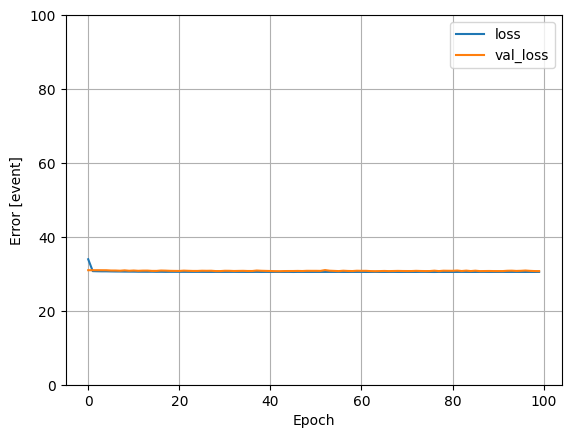

In [428]:
# import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [event]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [429]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    np.array(test_features,np.float32), test_labels, verbose=0)

506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step


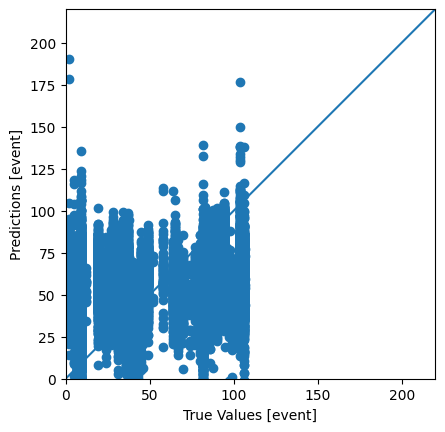

In [430]:
test_predictions = linear_model.predict(np.array(test_features,np.float32)).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [event]')
plt.ylabel('Predictions [event]')
lims = [0, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [431]:
test_preds= pd.DataFrame({"Original event": list(test_labels), "Predicted event": list(test_predictions.reshape(-1))})
test_preds["Percentage Difference"] = round(( abs(test_preds["Original event"] - test_preds[ "Predicted event"]) / test_preds["Original event"])*100 ,2)
print("Mean Percentage difference", test_preds["Percentage Difference"].mean())
test_preds

Mean Percentage difference 300.53837401891104


,Original event,Predicted event,Percentage Difference
0,94,31.325680,66.67
1,94,56.876144,39.49
2,94,71.957634,23.45
3,82,45.198132,44.88
4,94,93.195236,0.86
...,...,...,...
16176,88,59.319233,32.59
16177,88,69.344139,21.20
16178,88,48.274418,45.14
16179,90,83.686180,7.02


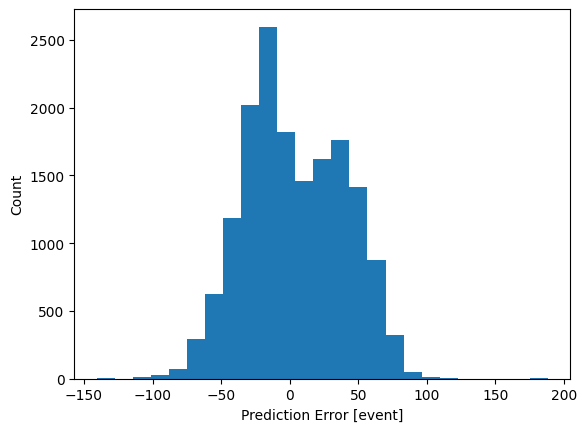

In [432]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [event]')
_ = plt.ylabel('Count')

## Save model file

In [433]:
linear_model.save('linear_model.keras')


## Deep Neural Network

In [434]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(train_features.shape[1],)),
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, name='output')
])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (None, 10)             │            21 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,950 (19.34 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 21 (88.00 B)

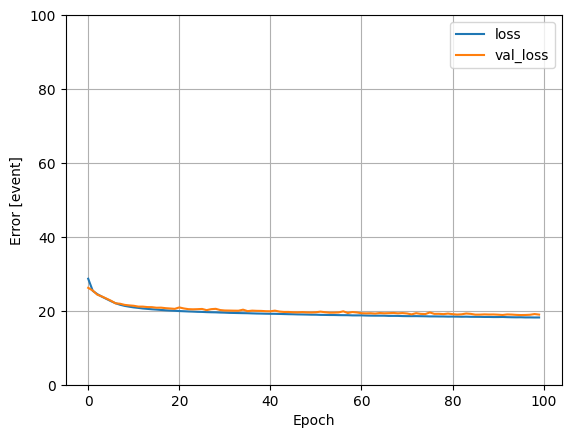

In [435]:
history = dnn_model.fit(
    np.array(train_features,np.float32),
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [436]:
test_results['dnn_model'] = dnn_model.evaluate(np.array(test_features,np.float32), test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [event]']).T

,Mean absolute error [event]
linear_model,30.457033
dnn_model,18.843273


506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


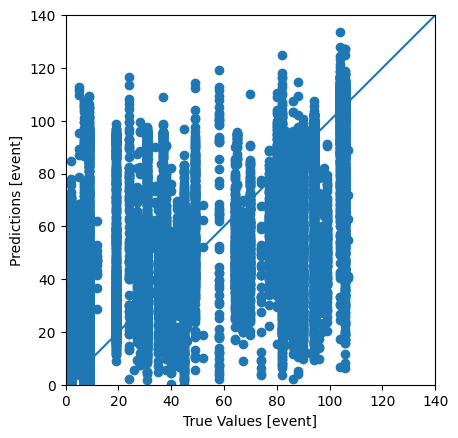

In [443]:
test_predictions = dnn_model.predict(np.array(test_features,np.float32)).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [event]')
plt.ylabel('Predictions [event]')
lims = [0, 140]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [438]:
test_preds= pd.DataFrame({"Original event": list(test_labels), "Predicted event": list(test_predictions.reshape(-1))})
test_preds["Percentage Difference"] = round(( abs(test_preds["Original event"] - test_preds[ "Predicted event"]) / test_preds["Original event"])*100 ,2)
print("Mean Percentage difference", test_preds["Percentage Difference"].mean())
test_preds

Mean Percentage difference 149.5689456770286


,Original event,Predicted event,Percentage Difference
0,94,46.162422,50.89
1,94,91.677231,2.47
2,94,55.529938,40.93
3,82,56.273026,31.37
4,94,94.561676,0.60
...,...,...,...
16176,88,57.948997,34.15
16177,88,45.764534,47.99
16178,88,55.135056,37.35
16179,90,72.261925,19.71


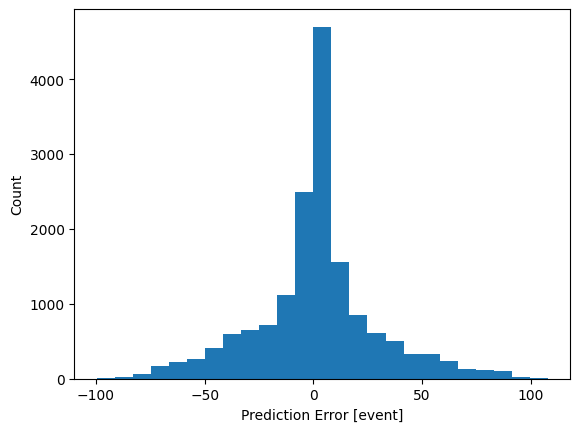

In [439]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [event]')
_ = plt.ylabel('Count')

In [440]:
dnn_model.save('dnn_model.keras')

#dnn_model.save('dnn_model.h5') # The '.h5' extension indicates that the model should be saved to HDF5. Needed if you want to use your model in a web application